# **Polynomial Regression**

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png">

<img src="https://raw.githubusercontent.com/mhuzaifadev/ml_zero_to_hero/master/POLY.png?token=AMSGSQ6JSER2XWQBDSHTBTS7N4KXY">







If your data points clearly will not fit a linear regression (a straight line through all data points), it might be ideal for polynomial regression.

simple linear regression algorithm only works when the relationship between the data is linear. But suppose we have non-linear data, then linear regression will not be able to draw a best-fit line. Simple regression analysis fails in such conditions. 

<img src="image.png">

Polynomial regression is a form of Linear regression where only due to the Non-linear relationship between dependent and independent variables, we add some polynomial terms to linear regression

# Use Cases for Polynomial Regression

## Agriculture
- **Use Case**: Estimating crop yield based on fertilizer quantity.
- **Example**: Crop yield might initially increase with more fertilizer, but excessive use could harm the plants, resulting in a parabolic relationship between fertilizer input and yield.


## Weather Prediction
- **Use Case**: Predicting temperature based on time of day or other weather variables.  
- **Example**: The relationship between time of day and temperature often follows a parabolic pattern (cooler in the morning and evening, warmer in the afternoon). Polynomial regression can model this non-linear relationship for accurate predictions.


In polynomial regression, hyperparameters refer to settings or parameters that we choose to control how the model works. The most important hyperparameter in polynomial regression is the degree of the polynomial. Here's a simple explanation:



# Degree Hyperparameter in Polynomial Regression

The **degree** of a polynomial determines the complexity of the curve the model can fit. Here’s how different degrees affect the model:

- **Degree = 1**: The model is a straight line (simple linear regression).  
- **Degree = 2**: The model forms a parabola (can curve once, like a "U" shape).  
- **Degree = 3 or more**: The model can curve multiple times, making it more flexible for capturing complex patterns.


# Importance of the Degree Hyperparameter

Choosing the right degree is crucial for model performance:

- **If the degree is too low**:  
  The model may be too simple to capture the pattern in the data. This is known as **underfitting**.

- **If the degree is too high**:  
  The model might try too hard to match every point in the data, leading to **overfitting**, where it performs well on the training data but poorly on new data.


# Example: Effect of Advertising Spend on Sales

Consider modeling the relationship between advertising spend and sales:

- **Degree = 1**:  
  Sales grow linearly as advertising increases. This model is too simple and may miss important trends.

- **Degree = 5**:  
  The curve fits every spike in sales perfectly, but it overfits the data and doesn’t generalize well to future trends.

- **Degree = 2**:  
  A smooth curve captures the main trend effectively without overfitting, providing a good balance between simplicity and complexity.


## **Getting Started with Polynomial Regression**

In [72]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import math

## **DataFraming**

Read .csv data into a DataFrame

In [73]:
dataset = pd.read_csv("./Drugs_Performance.csv")
dataset.head()

,Age,Drugs_Perf
0,1,1.166667
1,2,1.833333
2,3,2.833333
3,4,4.166667
4,5,5.833333


In [74]:
X = dataset[["Age"]].values
y = dataset[["Drugs_Perf"]].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]]
[[1.16666667e+00]
 [1.83333333e+00]
 [2.83333333e+00]
 [4.16666667e+00]
 [5.83333333e+00]
 [7.83333333e+00]
 [1.01666667e+01]
 [1.28333333e+01]
 [1.58333333e+01]
 [1.91666667e+01]
 [2.28333333e+01]
 [2.68333333e+01]
 [3.11666667e+01]
 [3.58333333e+01]
 [4.08333333e+01]
 [4.61666667e+01]
 [5.18333333e+01]
 [5.78333333e+01]
 [6.41666667e+01]
 [7.08333333e+01]
 [7.78333333e+01]
 [8.51666667e+01]
 [9.28333333e+01]
 [1.00833333e+02]
 [1.09166667e+02]
 [1.17833333e+02]
 [1.26833333e+02]
 [1.36166

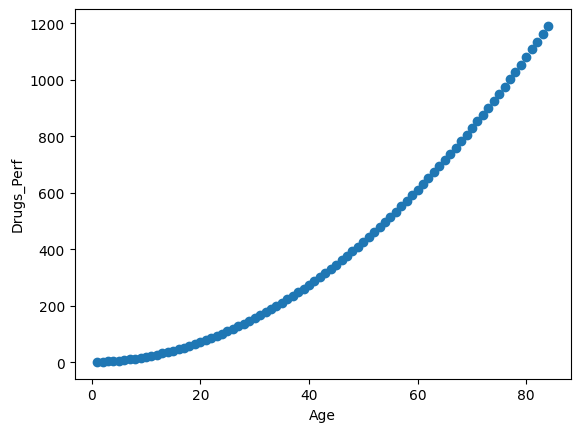

In [75]:
plt.scatter(X,y)
plt.xlabel("Age")
plt.ylabel("Drugs_Perf")
plt.show()

## **Splitting Data: Training and Test Set**

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2)

In [77]:
X_train

array([[68],
       [65],
       [38],
       [ 7],
       [32],
       [60],
       [73],
       [46],
       [14],
       [ 4],
       [27],
       [54],
       [45],
       [ 8],
       [82],
       [49],
       [15],
       [25],
       [83],
       [36],
       [71],
       [63],
       [40],
       [19],
       [67],
       [31],
       [66],
       [42],
       [10],
       [30],
       [11],
       [74],
       [62],
       [35],
       [ 1],
       [23],
       [16],
       [26],
       [51],
       [18],
       [28],
       [39],
       [56],
       [76],
       [61],
       [12],
       [22],
       [77],
       [ 9],
       [84],
       [47],
       [48],
       [80],
       [53],
       [21],
       [75],
       [ 3],
       [43],
       [13],
       [17],
       [ 5],
       [50],
       [57],
       [37],
       [44],
       [72],
       [ 6]], dtype=int64)

## **Preprocessing: Polynomial Features**

Prrocessing or optimizing our data for nth ploynomial features

In [78]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, Y_train)

PolynomialFeatures()

In [79]:
X_poly

array([[1.000e+00, 6.800e+01, 4.624e+03],
       [1.000e+00, 6.500e+01, 4.225e+03],
       [1.000e+00, 3.800e+01, 1.444e+03],
       [1.000e+00, 7.000e+00, 4.900e+01],
       [1.000e+00, 3.200e+01, 1.024e+03],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 7.300e+01, 5.329e+03],
       [1.000e+00, 4.600e+01, 2.116e+03],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 4.000e+00, 1.600e+01],
       [1.000e+00, 2.700e+01, 7.290e+02],
       [1.000e+00, 5.400e+01, 2.916e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 8.000e+00, 6.400e+01],
       [1.000e+00, 8.200e+01, 6.724e+03],
       [1.000e+00, 4.900e+01, 2.401e+03],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 8.300e+01, 6.889e+03],
       [1.000e+00, 3.600e+01, 1.296e+03],
       [1.000e+00, 7.100e+01, 5.041e+03],
       [1.000e+00, 6.300e+01, 3.969e+03],
       [1.000e+00, 4.000e+01, 1.600e+03],
       [1.000e+00, 1.900e+01, 3.61

## **Training the Model**
We are using Linear regression model as imported from sklearn library and then it's being trained on x and y (any 2 major axis of datasets)

In [80]:
model = LinearRegression()
model.fit(X_poly,Y_train)

LinearRegression()

## **Visualization**

Visualize the dataset with the fit model using matplotlib.

Text(0, 0.5, 'Drugs Performance')

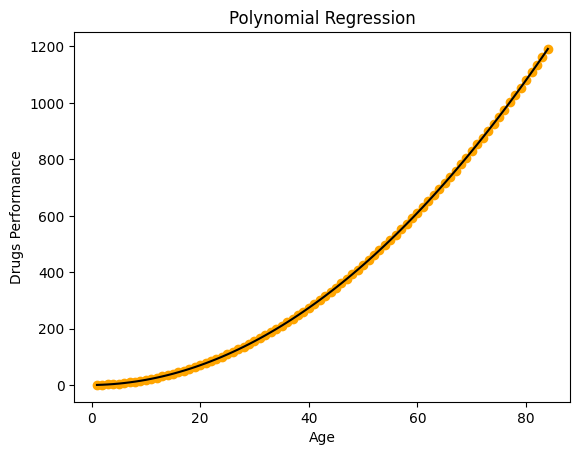

In [81]:
plt.scatter(X,y, color = 'orange')
plt.plot(X,model.predict(poly.fit_transform(X)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Age')
plt.ylabel('Drugs Performance')

## **Prediction**
We will predict the Brain weight by giving an input of Brain Size

In [82]:
X_test

array([[33],
       [70],
       [58],
       [ 2],
       [79],
       [34],
       [20],
       [64],
       [81],
       [29],
       [52],
       [78],
       [69],
       [55],
       [24],
       [59],
       [41]], dtype=int64)

In [83]:
print('Prediction by the model:\t', model.predict(poly.fit_transform(X_test)))

Prediction by the model:	 [[ 187.83333334]
 [ 829.1666666 ]
 [ 571.16666664]
 [   1.83333332]
 [1054.16666657]
 [ 199.16666667]
 [  70.83333334]
 [ 694.16666662]
 [1107.83333322]
 [ 145.83333334]
 [ 460.16666665]
 [1027.83333324]
 [ 805.83333327]
 [ 514.16666664]
 [ 100.83333334]
 [ 590.8333333 ]
 [ 287.83333333]]


# Second example:


In [84]:
import pandas as pd
import numpy as np

data = pd.read_csv("./Ice_cream selling data.csv")
data.head()


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [85]:
data.shape


(49, 2)

In [86]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [87]:
data.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [88]:
data.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

Spliting data into X and y

In [89]:
X = data['Temperature (°C)']
y = data['Ice Cream Sales (units)']


In [90]:
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)


Shape of X =  (49,)
Shape of y =  (49,)


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


<Axes: xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

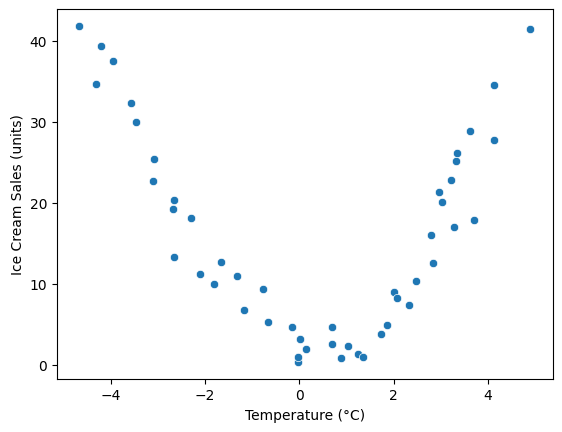

In [92]:
sns.scatterplot(data=data, x=X, y=y)


In [93]:
# Spliting data into test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)


In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39,), (10,), (39,), (10,))

In [95]:
type(X_train)

pandas.core.series.Series

In [96]:
# Reshape because we want 2D array
if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()
    X_test = X_test.to_frame()


Conversion: It converts a pandas Series (which is a one-dimensional labeled array) into a pandas DataFrame (which is a two-dimensional labeled data structure).


In [97]:
X_train.shape

(39, 1)

In [98]:
X_train

,Temperature (°C)
23,0.149245
38,2.959932
43,3.335932
26,0.874905
14,-1.660348
12,-2.111870
3,-3.949661
11,-2.288264
18,-0.673753
45,3.704057


In [99]:
if isinstance(y_train, pd.Series):
    y_train = y_train.to_frame()
    y_test = y_test.to_frame()


In [100]:
poly_reg = PolynomialFeatures(degree=5)
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)
X_train_poly.shape


(39, 6)

In [101]:
X_train_poly[0]

array([1.00000000e+00, 1.49244574e-01, 2.22739429e-02, 3.32426512e-03,
       4.96128532e-04, 7.40444914e-05])

In [102]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [103]:
# Evaluate the model
accuracy = model.score(X_test_poly, y_test)
print(f"\nModel R^2 Score: {accuracy:.2f}")



Model R^2 Score: 0.96


In [104]:
reshape_X = X.values.reshape(-1, 1)


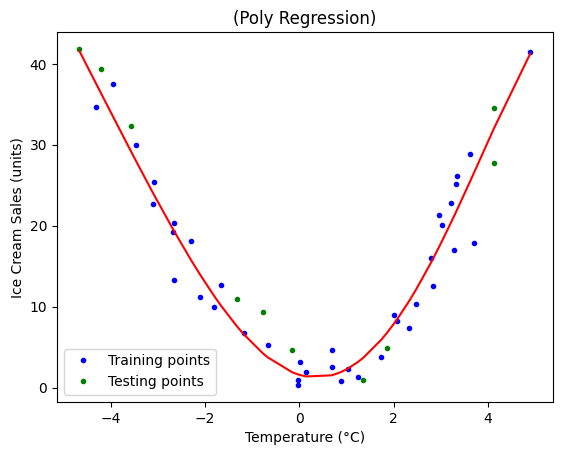

In [105]:
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.plot(X, model.predict(poly_reg.fit_transform(reshape_X)), c="r")
plt.title("(Poly Regression)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.legend()
plt.show()
